In [1]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
import pandas as pd

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_10124\101928570.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv(r'Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df['Channel'].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [5]:
df['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

### Scaling the countunios data columns 

In [6]:
cols = df.columns

scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [7]:
df= pd.DataFrame(df, columns=[cols])

In [8]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


## First we try kmeans clustering

In [9]:
# Initializing KMeans with the number of clusters (in this case, 3)
kmeans = KMeans(n_clusters=3, n_init='auto')

# Fitting the KMeans model to the standardized data
kmeans.fit(df)

KMeans(n_clusters=3)

In [10]:
kmeans.cluster_centers_


array([[-2.77555756e-16,  1.00000000e+00,  1.23720906e-01,
         4.67298591e-02,  4.18609634e-02,  5.96920070e-02,
         1.91966114e-02,  3.16079341e-02],
       [ 1.00000000e+00,  8.06338028e-01,  7.93712232e-02,
         1.45167000e-01,  1.75904072e-01,  2.67505864e-02,
         1.77995959e-01,  3.65130709e-02],
       [ 3.33066907e-16,  1.60919540e-01,  1.11427777e-01,
         4.50855547e-02,  4.46448095e-02,  6.48347347e-02,
         1.95219850e-02,  2.42966543e-02]])

In [11]:
kmeans.inertia_


41.731723442120064

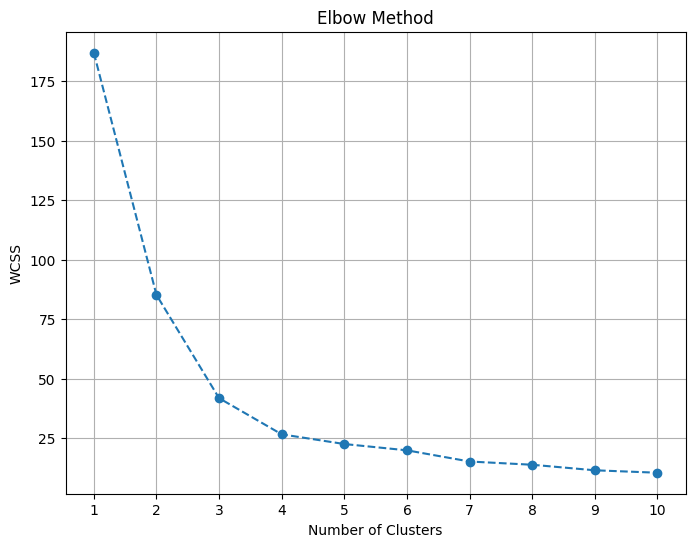

In [12]:
# Running KMeans for a range of clusters to apply the elbow method
wcss = []  # within-cluster sum of squares

for i in range(1, 11):  # trying clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)  # inertia_ contains WCSS for a particular k

# Plotting the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

### the best k number is 3 and we already use above 


## Then we try hierarichal clustering 


In [13]:
# Performing hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(df)

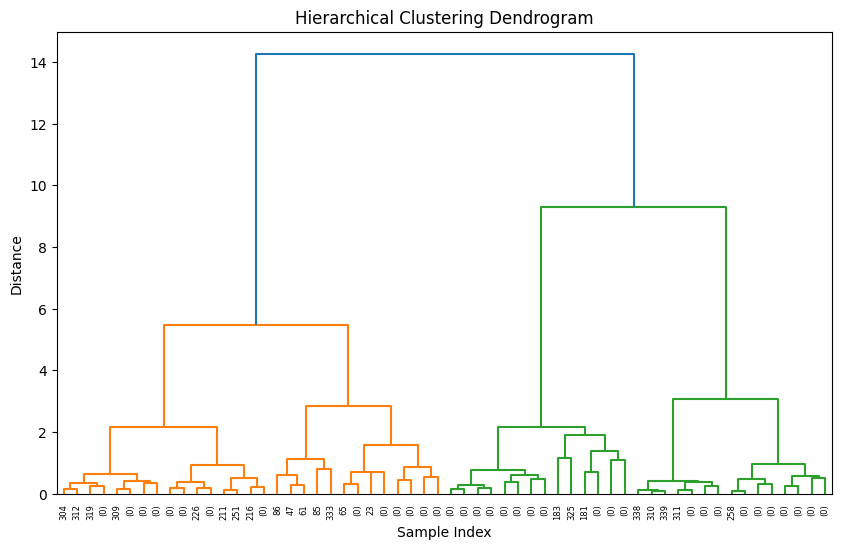

In [14]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([model.children_, model.distances_, np.zeros(model.distances_.shape[0])]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agg_clustering, truncate_mode='level', p=5)  # Adjust 'p' to change the view of the dendrogram


plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [15]:
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=15).fit(df)
agg_clustering.n_clusters_ = 3  # Set the desired number of clusters

# Assigning cluster labels to the data points using the new clustering
df['cluster_label'] = agg_clustering.labels_

In [16]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_label
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,0
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,0
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0


## Then we try the DBSCAN clustering 

In [17]:
from sklearn.cluster import DBSCAN

dbdf is the original data without the labels that we have from the hierarichal clustering

In [18]:
dbdf=df.drop(columns='cluster_label')
dbdf.head()

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_10124\1445814827.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  dbdf=df.drop(columns='cluster_label')


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [21]:
clustering = DBSCAN(eps=3, min_samples=2).fit(dbdf)
labels=clustering.labels_


In [25]:
import numpy as np
import scipy as sp

def dbscan_predict(dbscan_model, X_new, metric=sp.spatial.distance.cosine):
    # Result is noise by default
    y_new = np.ones(shape=len(X_new), dtype=int)*-1 

    # Iterate all input samples for a label
    for j, x_new in enumerate(X_new):
        # Find a core sample closer than EPS
        for i, x_core in enumerate(dbscan_model.components_): 
            if metric(x_new, x_core) < dbscan_model.eps:
                # Assign label of x_core to x_new
                y_new[j] = dbscan_model.labels_[dbscan_model.core_sample_indices_[i]]
                break

    return y_new